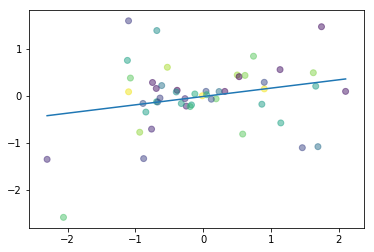

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Creates 50 random x and y numbers
np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)

# Makes the dots colorful
colors = np.random.rand(n)

# Plots best-fit line via polyfit
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

# Plots the random x and y data points we created
# Interestingly, alpha makes it more aesthetically pleasing
plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

In [2]:
x_values = [i for i in range(11)]
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [3]:
# Convert to numpy
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

In [4]:
# IMPORTANT: 2D required
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

In [5]:
y_values = [2*i + 1 for i in x_values]

In [6]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [7]:
# In case you're weak in list iterators...
y_values = []
for i in x_values:
    result = 2*i + 1
    y_values.append(result) 

In [8]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [9]:
y_train = np.array(y_values, dtype=np.float32)
y_train.shape

(11,)

In [10]:
# IMPORTANT: 2D required
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

In [11]:
import torch
import torch.nn as nn

In [12]:
# Create class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  

    def forward(self, x):
        out = self.linear(x)
        return out

In [13]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

In [14]:
criterion = nn.MSELoss()

In [15]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [16]:
epochs = 100

In [17]:
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = torch.from_numpy(x_train).requires_grad_()
    labels = torch.from_numpy(y_train)

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 

    # Forward to get output
    outputs = model(inputs)

    # Calculate Loss
    loss = criterion(outputs, labels)

    # Getting gradients w.r.t. parameters
    loss.backward()

    # Updating parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 149.8396453857422
epoch 2, loss 12.855883598327637
epoch 3, loss 1.6754722595214844
epoch 4, loss 0.756521463394165
epoch 5, loss 0.6746435165405273
epoch 6, loss 0.6611205339431763
epoch 7, loss 0.6532489657402039
epoch 8, loss 0.6459146738052368
epoch 9, loss 0.6386983394622803
epoch 10, loss 0.6315658092498779
epoch 11, loss 0.6245134472846985
epoch 12, loss 0.6175394058227539
epoch 13, loss 0.610643744468689
epoch 14, loss 0.6038244366645813
epoch 15, loss 0.5970818400382996
epoch 16, loss 0.5904141068458557
epoch 17, loss 0.5838210582733154
epoch 18, loss 0.5773018598556519
epoch 19, loss 0.5708550810813904
epoch 20, loss 0.5644803643226624
epoch 21, loss 0.5581770539283752
epoch 22, loss 0.5519440174102783
epoch 23, loss 0.5457807183265686
epoch 24, loss 0.5396856665611267
epoch 25, loss 0.5336594581604004
epoch 26, loss 0.527699887752533
epoch 27, loss 0.5218068957328796
epoch 28, loss 0.5159802436828613
epoch 29, loss 0.5102184414863586
epoch 30, loss 0.5045207142

In [18]:
# Purely inference
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()
predicted

array([[ 0.10812204],
       [ 2.2365606 ],
       [ 4.364999  ],
       [ 6.4934373 ],
       [ 8.621876  ],
       [10.750315  ],
       [12.878753  ],
       [15.007191  ],
       [17.13563   ],
       [19.264069  ],
       [21.392508  ]], dtype=float32)

In [19]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

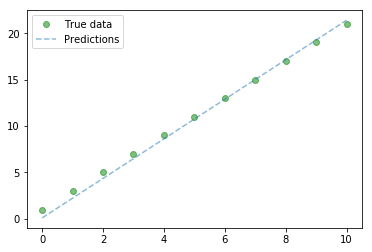

In [20]:
# Clear figure
plt.clf()

# Get predictions
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()

# Plot true data
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)

# Plot predictions
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()

In [22]:
save_model = False
if save_model is True:
    # Saves only parameters
    # alpha & beta
    torch.save(model.state_dict(), 'awesome_model.pkl')

In [23]:
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('awesome_model.pkl'))